In [1]:
# !pip install hurst
# !pip install rarfile
# !pip install pyunpack
# !pip install patool
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from hurst import compute_Hc
import time
from scipy.stats import skew, kurtosis
import warnings
from sklearn.decomposition import PCA
from scipy.signal import spectrogram
from pyunpack import Archive
import os
import rarfile
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
from IPython import display
display.set_matplotlib_formats('svg')

warnings.filterwarnings("ignore")


/var/folders/f0/yk_38ks9693585hklt0mrt9h0000gp/T/ipykernel_50414/2516550392.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# Ketan's paths
EEG_PATH = '/Users/ketanjaltare1/Desktop/Competitions/hms-harmful-brain-activity-classification/train_eegs/'
SPEC_PATH = '/Users/ketanjaltare1/Desktop/Competitions/hms-harmful-brain-activity-classification/train_spectrograms/'
DIRECTORY = ''

In [ ]:
rar_file_path = "/Users/ketanjaltare1/Desktop/Competitions/hms-harmful-brain-activity-classification/Features_wf_all.part01.rar"
extraction_directory = "/Users/ketanjaltare1/Desktop/Competitions/hms-harmful-brain-activity-classification/Features"

# Ensure the extraction path exists
os.makedirs(extraction_directory, exist_ok=True)
# Extract the .rar file
Archive(rar_file_path).extractall(extraction_directory)

In [ ]:
# Fabien's paths
EEG_PATH = 'D:/Kaggle/2024/Harmful_brain_activity_classification/train_eeg/'
SPEC_PATH = ''
DIRECTORY = 'D:/Kaggle/2024/Harmful_brain_activity_classification/'

In [3]:
# For eeg data
def loadeeg(path):
    eeg = pd.read_parquet(path)
#     eeg = eeg.replace(np.nan, 0) # There are missing values in some files. It makes the PCA analysis fail, so we need to replace them. I have chosen 0 for practicality
    return (eeg)

def hurst_fct(x):
    try:
        out = compute_Hc(x, simplified=True)[0]
    except:
        out = np.nan
    return out
        

In [4]:
# Functions to load a single dataset
train = pd.read_csv(DIRECTORY + 'train.csv')

# dataframe dimensiosn
print(train.shape)
train.head(10)

(106800, 15)


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
5,1628180742,5,26.0,353733,5,26.0,2413091605,42516,Seizure,3,0,0,0,0,0
6,1628180742,6,30.0,353733,6,30.0,364593930,42516,Seizure,3,0,0,0,0,0
7,1628180742,7,36.0,353733,7,36.0,3811483573,42516,Seizure,3,0,0,0,0,0
8,1628180742,8,40.0,353733,8,40.0,3388718494,42516,Seizure,3,0,0,0,0,0
9,2277392603,0,0.0,924234,0,0.0,1978807404,30539,GPD,0,0,5,0,1,5


In [5]:
# Samples where there is no consensus
eegids = train.eeg_id.unique()
no_agree = []
for id in eegids:
    temp = train.loc[train.eeg_id == id, 'expert_consensus']
    if len(temp.unique()) > 1:
        no_agree.append(id)
        print(id)
    
print(train.loc[train.eeg_id == no_agree[1],:])

2578018731
531742289
253736139
3636015289
4190652228
628369060
3088095149
2536169515
3193389863
3146689694
3635861314
3615551042
3125082527
3120659896
243307256
4239311496
797130385
3241992339
1319457379
3973597715
2534297198
3966881380
2521925389
186045431
2626435109
1058522598
2514145814
1671017107
2286494471
2541422575
2211351621
4172421134
3947918181
2791602373
656804144
2846570074
157675277
1811659876
2324700407
2523199400
3983553119
1500617679
1390125957
298831753
3338045490
980110178
2715793593
1920304099
595942340
46540529
316472104
1311572604
2593946087
1711387263
3641784164
3862768064
3294953337
1801854364
2142404109
3573637636
3971575294
3691913454
51360893
2221330234
3105038754
1695880945
4094368816
704176266
1487570601
759620270
140777105
4173919760
4206605966
3727831698
3794732127
3296538965
229636553
2300838982
1312393121
1613277780
2931436734
4268492759
3975418140
2103514234
185181940
630625254
354576203
2056467516
814932947
3064723248
587328035
2153150667
961630199
732

In [6]:
# Try computing synchronisation
from scipy.signal import hilbert
from scipy.signal import iirfilter, filtfilt

# Define your frequency bands as a list of tuples (lowcut, highcut)
frequency_bands = [(1, 4), (4, 8), (8, 12), (12, 30), (30, 95)]  # Example bands in Hz
fs = 200.0  # Sampling frequency
order = 5  # Filter order - This is a trade off in terms of accuracy and time. The lower the faster, but less accurate/narrow
filters = []
b, a = iirfilter(N=order, Wn=1, fs=fs, btype='lowpass', ftype='butter', output='ba')
filters.append((b,a))

for lowcut, highcut in frequency_bands:
    b, a = iirfilter(N=order, Wn=[lowcut, highcut], fs=fs, btype='band', ftype='butter', output='ba')
    filters.append((b,a))    

    
# Function for synchronisation calculation
def compute_synch(filters,data):
    all_synch = np.empty((0, len(filters)))
    for i, (b, a) in enumerate(filters):
        filtered_signal = filtfilt(b, a, data, axis = 0)

        # Calculate the PLV matrix
        try:
            n_points, n_channels, n_reps = filtered_signal.shape # We can change this if we decide to compute on a 2D matrix
        except:
            n_points, n_channels = filtered_signal.shape
            n_reps = 1
            
        plv_matrix = np.zeros((n_channels, n_channels, n_reps))

        # Compute the analytical signal for each channel
        analytical_signals = hilbert(filtered_signal, axis=0)

        # Extract phases
        phases = np.angle(analytical_signals)
        if len(phases.shape) <= 2:
            phases = phases[:,:,np.newaxis]

        # Compute PLV for each pair of channels
        for i in range(n_channels):
            for j in range(i, n_channels):
                phase_diff = phases[:,i,:] - phases[:,j,:]
                plv = np.abs(np.mean(np.exp(1j * phase_diff),axis=0))
                plv_matrix[i, j,:] = plv # Upper triangle of Symmetric matrix
        synch = plv_matrix[np.triu_indices(n_channels,k = 1)].T
        if all_synch.shape[0] == 0:
            all_synch = synch
        else:
            all_synch = np.hstack((all_synch, synch))
        
    return all_synch





def kl_divergence_loss(output, target, epsilon=1e-15):
    # Ensure the output is in log form and target is probabilities
#     log_output = F.log_softmax(output, dim=1)
    
    # Clip target to avoid division by zero or log(0)
    target = torch.clamp(target, epsilon, 1 - epsilon)
    
    # Calculate KL Divergence
    kl_div = target * torch.log(target / torch.exp(target))
    
    # Return mean KL Divergence across the batch
    return kl_div.sum(dim=1).mean()



In [7]:
# Load data for synchronisation computation
time_eeg = np.arange(-25, 25+ (1/200), (1/200))
Starttime = time.time()
labels = train.expert_consensus.unique()
numeegs = 50 # Number of datasets to load from each type
TD_data = {}
Synch_data = np.empty((0,171*len(filters)))
TD_ydata = []
Synch_ydat = np.empty((0,1))
Ydat_KL = np.empty((0,6))


for idx, label in enumerate(labels):
    tempid = train.eeg_id.where(train.expert_consensus == label).unique()
    tempid = tempid[~np.isnan(tempid)] # There were a few nans in there.
    chosen = np.random.choice(tempid,size=numeegs)
    
    for d in range(numeegs):
        path = f'{EEG_PATH}{int(chosen[d])}.parquet'
        fulleeg = loadeeg(path).to_numpy()[:,:19] # Excluding the ECG channel here
        offset = train.eeg_label_offset_seconds[train.eeg_id == chosen[d]].values
        tempdat = np.zeros((len(time_eeg)-1,19,len(offset)))
        tempy = train.loc[train.eeg_id == chosen[d], :].iloc[:, -6:]      #eeg_label_offset_seconds[train.eeg_id == chosen[d]].values
        Ydat_KL = np.vstack((Ydat_KL,tempy))
        for offind, off in enumerate(offset):
            if np.isnan(fulleeg[int(off)*200:(((int(off)+50)*200)),:]).any(): #Not sure why the nans are appearing.
                continue
            tempdat[:,:,offind] = fulleeg[int(off)*200:(((int(off)+50)*200)),:]
            
        TD_data[int(chosen[d])] = tempdat
        TD_ydata.append(label)
        
        Synch_data = np.vstack((Synch_data,compute_synch(filters,tempdat)))
        templabs = np.array([label] * tempdat.shape[2])
        templabs = templabs[:,np.newaxis]
        Synch_ydat = np.vstack((Synch_ydat,templabs))
        
        

TD_keys = list(TD_data.keys())
Ydat_KL = Ydat_KL / np.sum(Ydat_KL,axis=1,keepdims=True)
print(f'Time Taken: {(time.time() - Starttime)/60} minutes for {len(Synch_ydat)} datasets')

Time Taken: 26.1453871011734 minutes for 3957 datasets


In [73]:
# convert to tensor - Only for torch
from sklearn.preprocessing import LabelEncoder

dataT   = torch.tensor( Synch_data ).float()
# label_encoder = LabelEncoder()
# labelsT = label_encoder.fit_transform(Synch_ydat)
# labelsT = torch.tensor( labelsT ).long() # long = int64
labelsT = torch.tensor( Ydat_KL ).float() # long = int64
print(dataT.shape)
devidx = np.random.randint(0,dataT.shape[0],64)
mask = torch.ones(dataT.size(0), dtype=torch.bool)
mask[devidx] = False
devdata = dataT[~mask,:]
devlabels = labelsT[~mask,:]
dataT = dataT[mask,:]
labelsT = labelsT[mask,:]

print(dataT.shape)


# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)


# convert into PyTorch Datasets
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)
dev_data   = TensorDataset(devdata,devlabels)
dev_loader  = DataLoader(dev_data,batch_size=dev_data.tensors[0].shape[0])

# Step 4: translate into dataloader objects
def CreateBatch(size,train_data,test_data):
    batchsize    = size
    train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
    test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])
    return (train_loader,test_loader)


torch.Size([3957, 1026])
torch.Size([3893, 1026])


In [74]:

# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(Synch_data.shape[1],128)
      
      ### hidden layer
      self.fc1 = nn.Linear(128,200)
      self.fc2 = nn.Linear(200,128)
      self.fc3 = nn.Linear(128,64)
      self.dropout = nn.Dropout(0.2)

      ### output layer
      self.output = nn.Linear(64,6)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      # x = self.dropout(x)
      x = F.relu( self.fc2(x) )
      # x = self.dropout(x)
      x = F.relu( self.fc3(x) )
      return torch.log_softmax( self.output(x),axis=1 )
  
  # create the model instance
  net = mnistNet()
  
  # loss function
#   lossfun = nn.NLLLoss()
  lossfun = nn.KLDivLoss(reduction='batchmean')

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=1e-4, weight_decay=1e-5)

  return net,lossfun,optimizer

# test the model with one batch
net,lossfun,optimizer = createTheMNISTNet()

train_loader,test_loader = CreateBatch(32,train_data,test_data)
X, y = next(iter(train_loader))
yHat = net(X)
# print(yHat)
# values are log-probability of each number (0-9)
# print(torch.exp(yHat))

# now compute the loss for the single forward pass
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

 
Loss:
tensor(1.3048, grad_fn=<DivBackward0>)


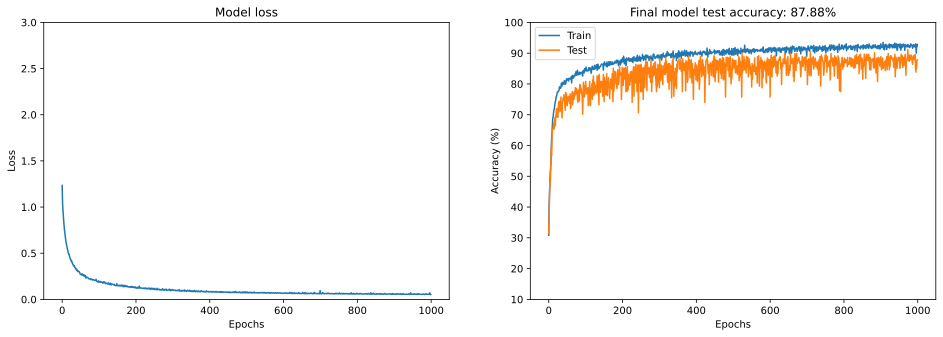

In [66]:
# a function that trains the model
def funtion2trainTheModel():

  # number of epochs
  numepochs = 1000
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []
  
  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)
      

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == torch.argmax(y,axis=1)     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==torch.argmax(y,axis=1)).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net

# Train the model
train_loader,test_loader = CreateBatch(32,train_data,test_data)
trainAcc,testAcc,losses,net = funtion2trainTheModel()

# Plot the training and test accuracies
fig,ax = plt.subplots(1,2,figsize=(16,5))
ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

In [67]:
# run the model through for the test data and print the test KLD
X,y = next(iter(test_loader))
predictions = net(X).detach()
print(f'Pytorch KLD loss: {lossfun(predictions,y)}')


Pytorch KLD loss: 0.1555936336517334


In [76]:
# Test batch sizes - This takes about 100 minutes to run
sizes = np.array([8,64,128])
finaltestaccuracies = np.empty((3,3))

for idx,size in enumerate(sizes):
    for loop in range(3):
        train_loader,test_loader = CreateBatch(int(size),train_data,test_data)
        print(size)
        trainAcc,testAcc,losses,net = funtion2trainTheModel()

        # run the model through for the dev data and print the test KLD
        X,y = next(iter(dev_loader))
        predictions = net(X).detach()
        finaltestaccuracies[loop,idx] = lossfun(predictions,y)
        

8
8
8
64
64
64
128
128
128


[[0.2111676  0.1916407  0.18943065]
 [0.19829115 0.2104471  0.1808928 ]
 [0.22137207 0.20936587 0.17406189]]


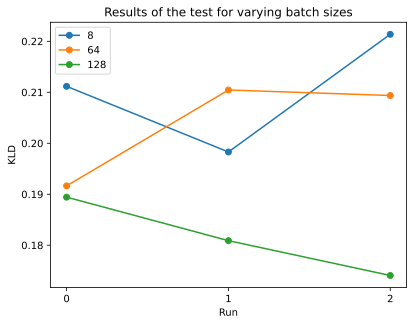

In [89]:
print(finaltestaccuracies)
labels = ['8','64','128']
for i in range(3):
    plt.plot(finaltestaccuracies[:,i],'o-', label = labels[i])
plt.legend()
plt.xlabel('Run')
plt.ylabel('KLD')
plt.xticks([0,1,2])
plt.title('Results of the test for varying batch sizes')
plt.show()

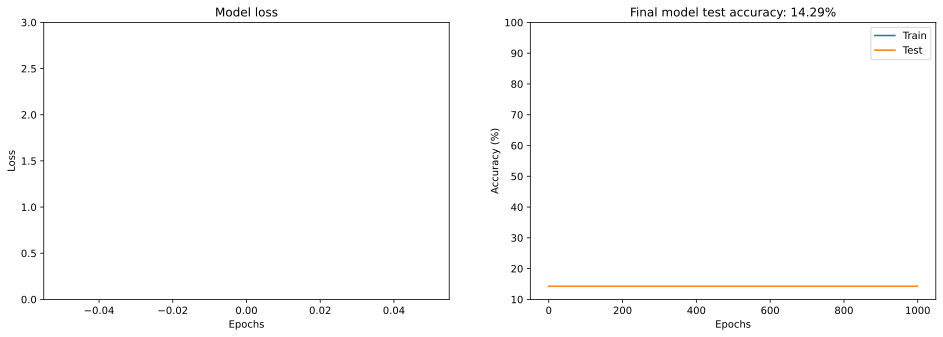

In [56]:

# Plot the training and test accuracies
fig,ax = plt.subplots(1,2,figsize=(16,5))
ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

In [44]:
# run the model through for the test data and print the test KLD
X,y = next(iter(dev_loader))
predictions = net(X).detach()
print(f'Pytorch loss: {lossfun(predictions,y)}')
# print(f'The custom loss is: {kl_divergence_loss(output, target)}')

tensor(1.2928)
